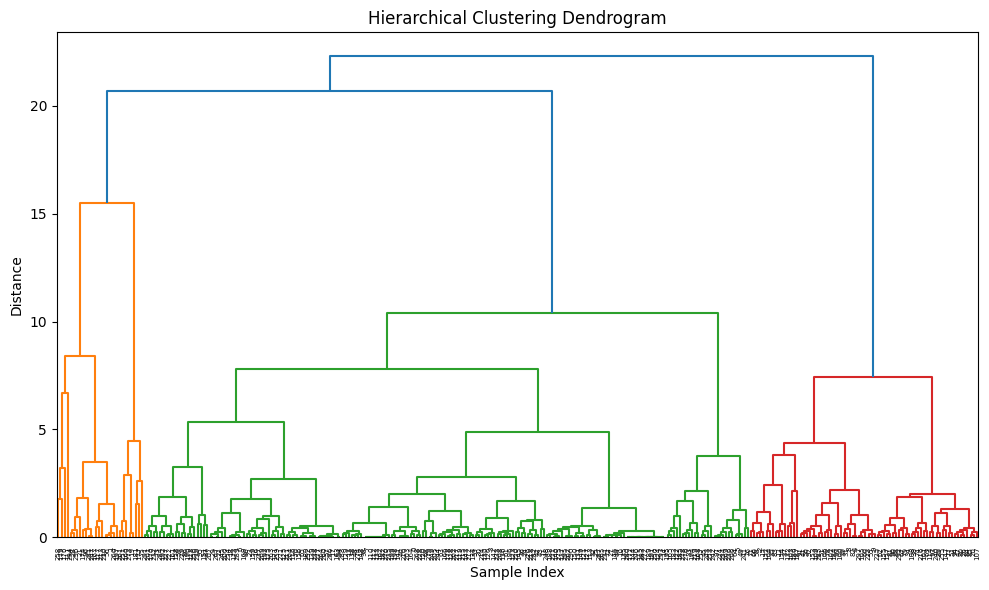

          Labor_Force  Unemployment_Rate  Poverty_Rate
Cluster                                               
1        19321.121622           3.263819      8.061309
2         1312.107143           2.994233      8.421144
3          241.375000          26.278968     20.677026
4          332.350000           5.697406     39.639729


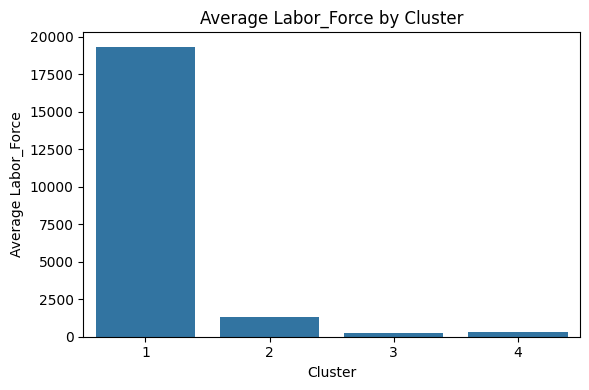

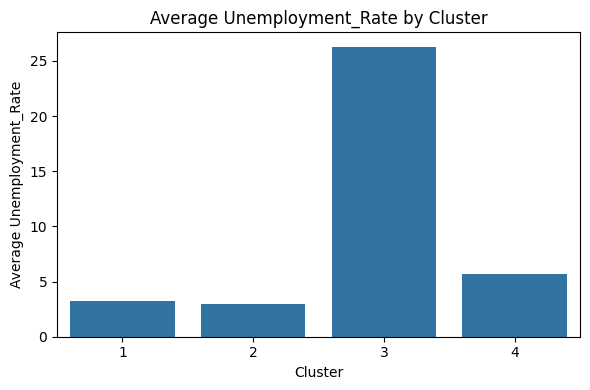

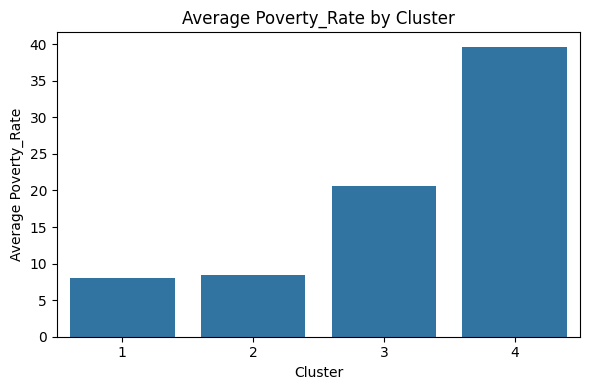

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

#Load the dataset
df = pd.read_csv('Utah_PNU_Data.csv')

#Select relevant numerical features
numerical_data = df[['Labor_Force', 'Unemployment_Rate', 'Poverty_Rate']]

#Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

#Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')

#Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

#Assign cluster labels (using 4 clusters)
cluster_labels = fcluster(linked, 4, criterion='maxclust')

#Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

#View summary statistics for each cluster
cluster_summary = df.groupby('Cluster')[['Labor_Force', 'Unemployment_Rate', 'Poverty_Rate']].mean()
print(cluster_summary)

#Optional: Visualize cluster characteristics
import seaborn as sns
for column in ['Labor_Force', 'Unemployment_Rate', 'Poverty_Rate']:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=cluster_summary.index, y=cluster_summary[column])
    plt.title(f'Average {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {column}')
    plt.tight_layout()
    plt.show()

Justification: While using Hierarchical clustering, users may find out what some of the clusters are. Users then may find similar zip codes regarding poverty and unemployment in CO and UT in relation to one another, they may also input certain data from other states' zip codes and find similar zip codes in this clustering model of UT and CO.

Explanation: by visualizing and interpreting the visualizations of the cluster, one can glean interesting information such as: zipcodes with high labor force tends to have low poverty and unemployment; zipcodes that have a low labor force tends to also have high unemployment rate. users may also enter in certain stats from other states to compare labor force, poverty, and unemployment in different zipcodes to the ones in UT and CO.

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Load your dataset
df = pd.read_csv('Utah_PNU_Data.csv')

# Discretize numerical columns into bins
bin_labels = ['Low', 'Medium', 'High']
df['LF'] = pd.qcut(df['Labor_Force'], q=3, labels=bin_labels)
df['UR'] = pd.qcut(df['Unemployment_Rate'], q=3, labels=bin_labels)
df['PR'] = pd.qcut(df['Poverty_Rate'], q=3, labels=bin_labels)

# Create transactions for each row
transactions = df[['LF', 'UR', 'PR']].astype(str)
transactions = transactions.apply(lambda x: [f'{col}_{val}' for col, val in zip(transactions.columns, x)], axis=1)

# Convert to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Run FP-Growth
frequent_itemsets = fpgrowth(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

# Output results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
     support                itemsets
0   0.335570               (UR_High)
1   0.332215                (PR_Low)
2   0.332215             (LF_Medium)
3   0.332215                (UR_Low)
4   0.332215               (PR_High)
5   0.332215                (LF_Low)
6   0.335570               (LF_High)
7   0.332215             (UR_Medium)
8   0.335570             (PR_Medium)
9   0.134228     (PR_Low, UR_Medium)
10  0.114094       (LF_High, PR_Low)
11  0.154362        (PR_Low, UR_Low)
12  0.134228    (UR_High, LF_Medium)
13  0.107383     (PR_Low, LF_Medium)
14  0.110738     (UR_Low, LF_Medium)
15  0.130872    (LF_Medium, PR_High)
16  0.100671     (UR_Low, PR_Medium)
17  0.197987      (UR_High, PR_High)
18  0.177852        (UR_Low, LF_Low)
19  0.124161       (LF_Low, PR_High)
20  0.110738        (PR_Low, LF_Low)
21  0.104027      (LF_High, UR_High)
22  0.187919    (LF_High, UR_Medium)
23  0.140940  (UR_Medium, PR_Medium)
24  0.144295    (LF_High, PR_Medium)

Association Rules:

Justification: This is to see what some of the most common combinations of features might be in the context of poverty and unemployment in UT and CO.

Explanation: some of the interesting observations are: high labor force correlates with low poverty at 12% support, high labor force also correlates with high unemployment at 11% support.